In [173]:
import pandas as pd
import numpy as np
import zipfile 

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [174]:
zip_file = zipfile.ZipFile('data.zip')
files = zip_file.namelist()

In [175]:
files

['data/data_2d.csv', 'data/mnist.csv']

In [176]:
df_2d = pd.read_csv(zip_file.open(files[0]), header=None)
df_mnist = pd.read_csv(zip_file.open(files[1]), header=None)

In [177]:
df_2d

,0,1,2
0,0.0,-0.768716,0.460860
1,0.0,2.687848,2.366961
2,0.0,-0.201379,0.470430
3,0.0,0.608496,1.225400
4,0.0,-0.082282,1.137218
...,...,...,...
195,1.0,0.629144,4.378584
196,1.0,-0.723824,5.361801
197,1.0,1.346107,2.333476
198,1.0,3.608219,3.411546


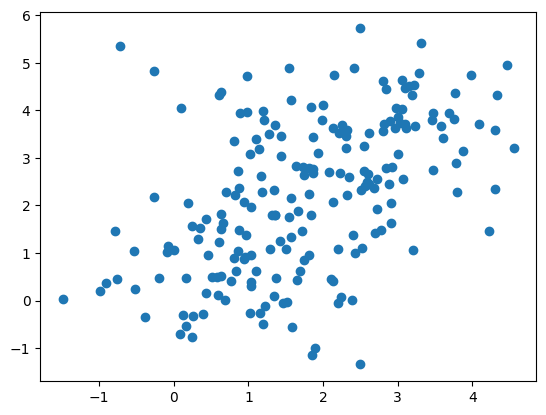

In [178]:
plt.scatter(df_2d[1], df_2d[2])
plt.show()

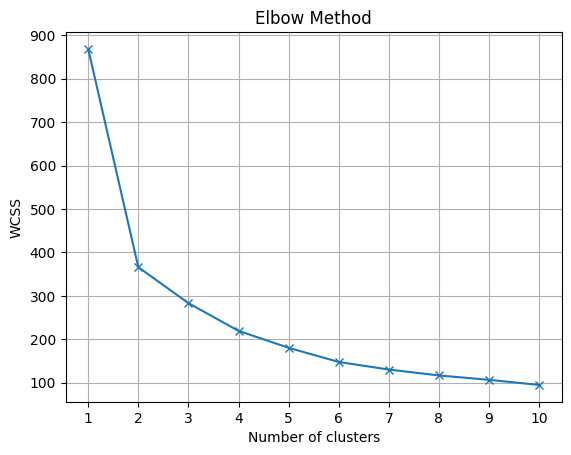

In [179]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_2d)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss, marker='x')
plt.grid()
plt.xticks(np.arange(1,11))
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

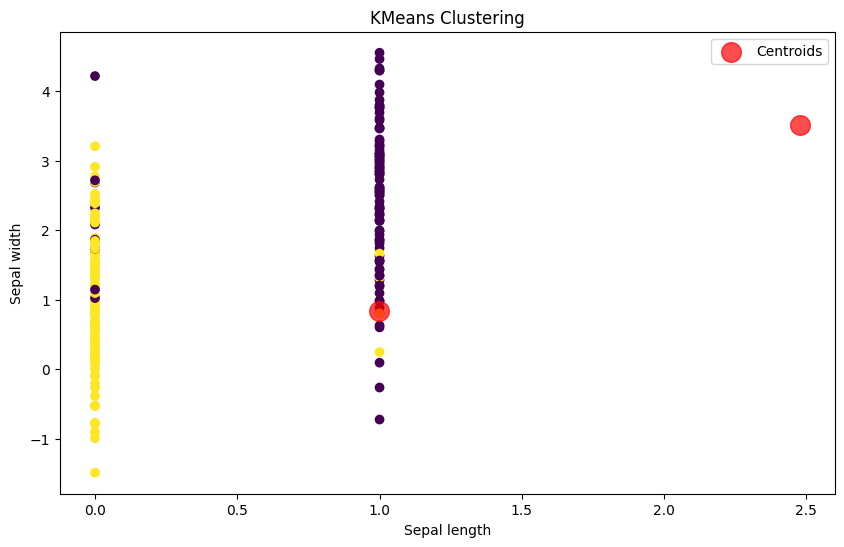

In [180]:
import matplotlib.pyplot as plt

kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(df_2d)

# Зріз даних з датафрейму, наприклад, виберемо стовпці з індексами 1 та 2 і весь датафрейм
subset = df_2d.iloc[:, [1, 2]]

# Створюємо графік розсіювання з мітками і легендою
plt.figure(figsize=(10,6))
plt.scatter(df_2d.iloc[:, 0], df_2d.iloc[:, 1], c=pred_y, cmap='viridis')

# Побудова центрів кластерів
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 1], centers[:, 2], c='red', s=200, alpha=0.7, label='Centroids')

# Додамо мітки для осей
plt.title('KMeans Clustering')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

# Додамо легенду
plt.legend()

# Виводимо графік
plt.show()